# MoveMatch: PoseComparison powered by mediapipe

### Importing the modules

In [1]:
# Import required modules
import cv2
import time
import numpy as np
from utils import utilFunctions

import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.signal import savgol_filter
from mediapipe.python.solutions import pose as mp_pose

2023-09-01 16:41:23.226816: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-01 16:41:23.769524: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Loading the Reference image and extracting its coordinates

In [2]:
# Initialize pose estimation model
pose = mp_pose.Pose(model_complexity=2, min_detection_confidence=0.1, min_tracking_confidence=0.2, static_image_mode=True)

# Load the reference image
ref_img_path = 'reference_images/ref_1.png'

#Extract the coordinates and confidence scores
ref_img, ref_coords, ref_norm_coords, ref_cf = utilFunctions.extract_coordinates(pose, ref_img_path)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


### Loading the video and extracting its frames and coordinates

In [3]:
video_path = 'reference_videos/test_1.mp4'

vid_frames, vid_coords, vid_cf = utilFunctions.process_video(video_path)

Successfully processed the video! | Frames: 253 | FPS: 0.04


### Comparing the Ref pose with the Frames

In [4]:
smooth_coords = savgol_filter(np.array(vid_coords), 10, 1, axis=0)
scores = []
for coords in smooth_coords:
    coords = utilFunctions.get_new_coords(coords.copy())
    coords_std = preprocessing.normalize(coords, norm='l2')
    score = utilFunctions.weighted_distance_matching(ref_norm_coords.flatten(), ref_cf, coords_std.flatten())
    scores.append(score)
    
match_idx = np.argmax(scores)

### Plotting the results

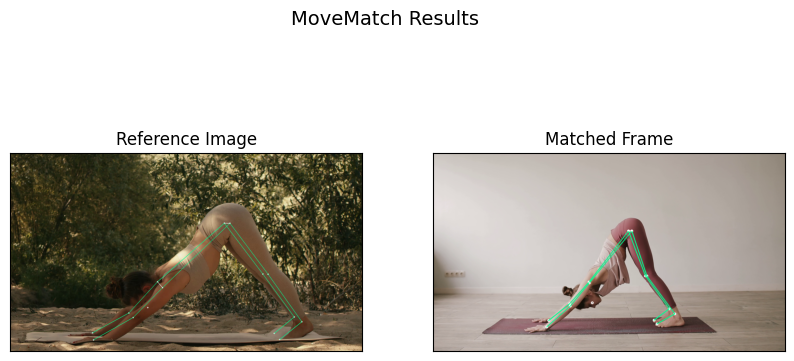

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

plt.suptitle('MoveMatch Results', fontsize=14)

axs[0].set_title('Reference Image')
axs[0].imshow(utilFunctions.draw_pose(ref_img, ref_coords, 4))
axs[1].set_title('Matched Frame')
axs[1].imshow(utilFunctions.draw_pose(vid_frames[match_idx], vid_coords[match_idx], 4))

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig('result.png')
plt.show()